In [2]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [1]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import ast

In [78]:
total_data = pd.read_csv('./data/tokenized_data_3.csv', encoding_errors='ignore', low_memory=False)

In [79]:
total_data['restaurant_id'].nunique()

67

In [80]:
# Define a function to convert a string representation of a list to a list
def string_to_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

# Apply the function to each element in the 'tokenized' column
total_data['tokenized'] = total_data['tokenized'].apply(string_to_list)

# Group by 'restaurant_id' and concatenate tokenized lists
grouped_data = total_data.groupby('restaurant_id')['tokenized'].agg(lambda x: sum(x, []))

# Results
print(grouped_data)

restaurant_id
11487063    [찌개, 존, 마, 밥, 맛, 김치찌개, 라면, 김치찌개, 김치찌개, 여기, 갑, ...
11550769    [친절, 맥주, 감, 기본, 안주, 무한, 흡입, 중독성, 맛, 샐러드, 것, 차로...
11555415    [커피, 스타, 유자, 민트, 친절, 사람, 강남, 스타, 중, 매장, 라, 직원,...
11595227    [곳, 오랜만, 서비스, 방어, 감동, 이날, 것, 보쌈, 친구, 나, 오랜만, 역...
11605721    [진짜, 맛, 최고, 친절, 맛, 기분, 최고, 맛, 미, 미, 최고, 게장, 숙성...
                                  ...                        
12972837    [포장, 죽, 최고, 이날, 마지막, 주문, 제가, 거, 덕분, 환자, 감사, 맛,...
12986974    [저의, 점심, 주시, 바우, 골, 감사, 자, 주가, 단골집, 김치찌개, 쭈꾸미,...
13015562    [분위기, 안주, 오랜만, 구들, 성비, 것, 차로, 술집, 발견, 이야기, 데이트...
13052928    [인테리어, 옛날, 중식, 느낌, 메뉴, 가짓수, 백종, 원, 짬뽕, 랩소디, 보고...
13066017    [강남, 역, 띠, 제삼성, 타운, 점, 종류, 다양, 임팩트, 빵, 쿠키, 진한,...
Name: tokenized, Length: 67, dtype: object


In [81]:
# Convert grouped_data Series to dictionary
grouped_dict = grouped_data.to_dict()

# 결과 확인
for key, value in grouped_dict.items():
    print(f"restaurant_id: {key}, tokenized values: {value}")

restaurant_id: 11487063, tokenized values: ['찌개', '존', '마', '밥', '맛', '김치찌개', '라면', '김치찌개', '김치찌개', '여기', '갑', '듯', '돌솥', '밥', '존', '맛', '계란', '존', '맛', '김치찌개', '오랫동안', '김치찌개', '맛', '혼', '밥', '맛', '밥', '솥', '밥', '밑반찬', '솥', '밥', '맛', '나', '김치찌개', '계란', '말', '맛', '집', '성비', '밥', '솥', '김치찌개', '계란', '말', '강추', '김치찌개', '요신', '맛', '김치찌개', '기도', '양도', '가격', '김치찌개', '맛', '나', '돼지고기', '김치', '양도', '가격', '요가', '성비', '최', '예', '전', '돌솥', '밥', '지금', '이해', '점심', '메뉴', '김치', '계란', '말', '인원수', '주문', '것', '추천', '정신', '식사', '서비스', '기대', '회사', '근처', '라', '오래전', '점심때', '가용', '밥', '김치찌개', '여사장', '친절', '이제', '지하', '점심때', '삼겹살', '맛', '점심때', '김치', '꽁치', '찌개', '맛', '나용', '구이', '마마', '삼겹살', '항정', '살', '대치동', '잠', '거', '김치찌개', '것', '식사', '메뉴', '최고', '굿', 'ㅇ', '반찬', '누룽지', '굿', '굿', '김치찌개', '계란', '말', '조합', '삼겹살', '고기', '공기', '밥', '윤기', '밥', '가마솥', '밥', '다음', '감치', '찌개', '김치찌개', '짱', '내', '인생', '최악', '식당', '고기', '거', '고기', '구어', '구어', '라', '잔소리', '가게', '간섭', '추천', '파', '겉절이', '양', '콩나물', '투척', '거기', '양념', '초장', 

In [82]:
# 각 레스토랑 ID 별로 토큰화된 값들의 리스트의 갯수를 새는 코드
counts_by_restaurant_id = grouped_data.apply(lambda x: len(x))

# 결과 확인
for restaurant_id, count in counts_by_restaurant_id.items():
    print(f"restaurant_id: {restaurant_id}, tokenized value count: {count}")

restaurant_id: 11487063, tokenized value count: 245
restaurant_id: 11550769, tokenized value count: 1143
restaurant_id: 11555415, tokenized value count: 2950
restaurant_id: 11595227, tokenized value count: 2117
restaurant_id: 11605721, tokenized value count: 3516
restaurant_id: 11606064, tokenized value count: 1847
restaurant_id: 11607099, tokenized value count: 176
restaurant_id: 11609026, tokenized value count: 290
restaurant_id: 11609540, tokenized value count: 6568
restaurant_id: 11674837, tokenized value count: 1761
restaurant_id: 11679379, tokenized value count: 1408
restaurant_id: 11679536, tokenized value count: 2127
restaurant_id: 11684163, tokenized value count: 777
restaurant_id: 11684180, tokenized value count: 1512
restaurant_id: 11684851, tokenized value count: 498
restaurant_id: 11685193, tokenized value count: 297
restaurant_id: 11694359, tokenized value count: 111
restaurant_id: 11702941, tokenized value count: 4341
restaurant_id: 11706204, tokenized value count: 296
r

In [83]:
from collections import Counter

# tokens_dict의 각 음식점에 대해
for restaurant, tokens in grouped_dict.items():
    # 단어 출현 횟수가 1인 단어를 제외하고 카운트
    filtered_tokens = [token for token in tokens if tokens.count(token) > 3]
    # 각 단어의 출현 횟수를 카운트
    word_counts = Counter(filtered_tokens)
    # 기존의 tokens_dict에 추가
    grouped_dict[restaurant] = word_counts

In [84]:
grouped_dict[11487063]

Counter({'밥': 18,
         '김치찌개': 16,
         '맛': 15,
         '계란': 6,
         '돌솥': 5,
         '말': 5,
         '집': 4,
         '김치': 4,
         '추천': 4,
         '거': 4})

In [85]:
# output을 저장
output = ', '.join(f"{word}: {count}" for word, count in word_counts.items())

# 카운트를 내림차순으로 정렬
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 정렬된 카운트를 문자열로 변환하여 출력
sorted_output = ', '.join(f"{word}: {count}" for word, count in sorted_counts)
print(sorted_output)

커피: 51, 빵: 40, 맛: 36, 주차: 32, 티: 29, 시간: 22, 친절: 21, 강남: 20, 분: 19, 코: 19, 굿: 19, 케익: 18, 케이크: 17, 곳: 15, 음료: 15, 역: 14, 띠: 14, 라: 14, 사람: 14, 매장: 13, 떼: 13, 직원: 13, 자리: 12, 타운: 11, 나: 11, 것: 10, 삼성: 10, 무료: 9, 지하: 9, 시: 9, 삼성전자: 9, 롤: 9, 가능: 9, 할인: 9, 때: 8, 디저트: 8, 장소: 8, 이용: 7, 수: 7, 사옥: 7, 지하층: 7, 화이트: 7, 종류: 6, 분위기: 6, 주문: 6, 서초: 6, 대화: 6, 노: 6, 다양: 5, 후: 5, 포장: 5, 밤: 5, 원: 5, 망고: 5, 결제: 5, 주말: 5, 불친절: 5, 한잔: 4, 점심: 4, 구입: 4, 쉬폰: 4, 최고: 4, 베이커리: 4, 지원: 4, 버터: 4, 가격: 4, 빙수: 4, 거: 4, 아메리카: 4


In [86]:
grouped_dict.values()

dict_values([Counter({'밥': 18, '김치찌개': 16, '맛': 15, '계란': 6, '돌솥': 5, '말': 5, '집': 4, '김치': 4, '추천': 4, '거': 4}), Counter({'맛': 78, '치킨': 68, '바베큐': 53, '집': 25, '양념': 24, '구이': 24, '숯불': 23, '소금': 17, '곳': 16, '친절': 15, '마늘': 13, '서비스': 12, '최고': 11, '사장님': 10, '골뱅이': 10, '금강': 9, '닭': 9, '거': 9, '년': 9, '맥주': 8, '것': 8, '맥': 8, '튀김': 8, '강남': 8, '동네': 7, '굿': 7, '오랜만': 7, '옛날': 7, '포장': 6, '가게': 6, '방문': 6, '나': 6, '번': 6, '샐러드': 5, '듯': 5, '완전': 5, '떡': 5, '집이': 5, '감자': 5, '주문': 5, '기본': 4, '노포': 4, '느낌': 4, '치': 4, '신': 4, '논': 4, '직원': 4, '분': 4, '지금': 4, '소스': 4, '유명': 4, '단골': 4, '추억': 4, '생맥주': 4, '때': 4, '사람': 4, '음식': 4, '먹': 4, '말': 4, '반반': 4, '소면': 4}), Counter({'친절': 180, '사람': 100, '매장': 95, '맛': 78, '직원': 63, '층': 60, '강남': 55, '분': 53, '커피': 52, '스타': 51, '자리': 43, '굿': 43, '음료': 38, '떼': 37, '화장실': 35, '라': 31, '곳': 28, '티': 21, '역': 21, '나': 20, '것': 20, '이용': 20, '거': 18, '시': 18, '주문': 17, '감사': 16, '짱': 16, '좌석': 15, 'ㅎ': 14, '메뉴': 14, '때': 14, '대화': 14, '여기': 13

In [87]:
len(list(grouped_dict.values()))

67

In [53]:
# 각 레스토랑 ID 별로 토큰화된 값들의 리스트의 갯수를 새는 코드
counts_by_restaurant_id = grouped_dict.apply(lambda x: len(x))

# 결과 확인
for restaurant_id, count in counts_by_restaurant_id.items():
    print(f"restaurant_id: {restaurant_id}, tokenized value count: {count}")

AttributeError: 'dict' object has no attribute 'apply'

In [82]:
text = grouped_dict[11708043]

In [83]:
import re

# 패턴을 문자열로 변환
pattern_str = r'[ㄱ-ㅎ|ㅏ-ㅣ]+[ㄱ-ㅎ니다]'
# 패턴을 STOPWORDS 세트에 추가
STOPWORDS.add(pattern_str)

stopwords = ['ㄴ','으로','에서', '어서','아','없','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [84]:
for i in range(len(stopwords)):
    STOPWORDS.add(stopwords[i])

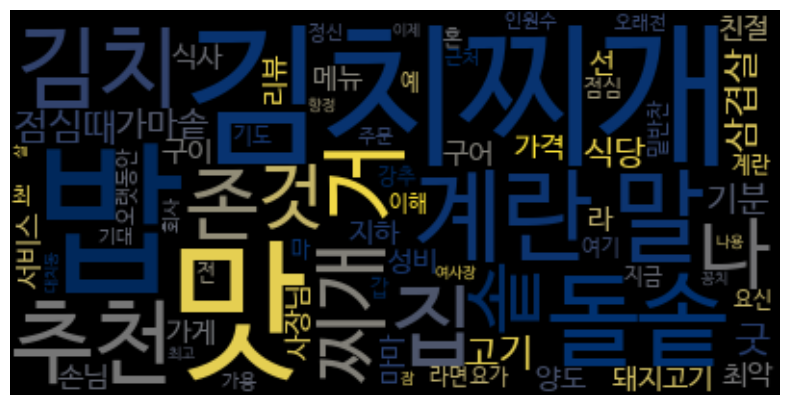

In [85]:
from wordcloud import WordCloud

# 나눔글꼴의 경로를 지정합니다.
font_path = "C:/Users/USER/Desktop/final_project/nanum-all/nanum/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
# 단어들의 리스트를 하나의 문자열로 변환합니다.
text = ' '.join(grouped_dict[11487063]) 

# 나눔글꼴을 사용하여 워드 클라우드를 생성합니다.
wordcloud = WordCloud(max_words=75, font_path=font_path, stopwords=STOPWORDS, colormap='cividis', background_color='black').generate(text)

# 워드 클라우드를 화면에 출력합니다.
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
STOPWORDS.add(stopwords)

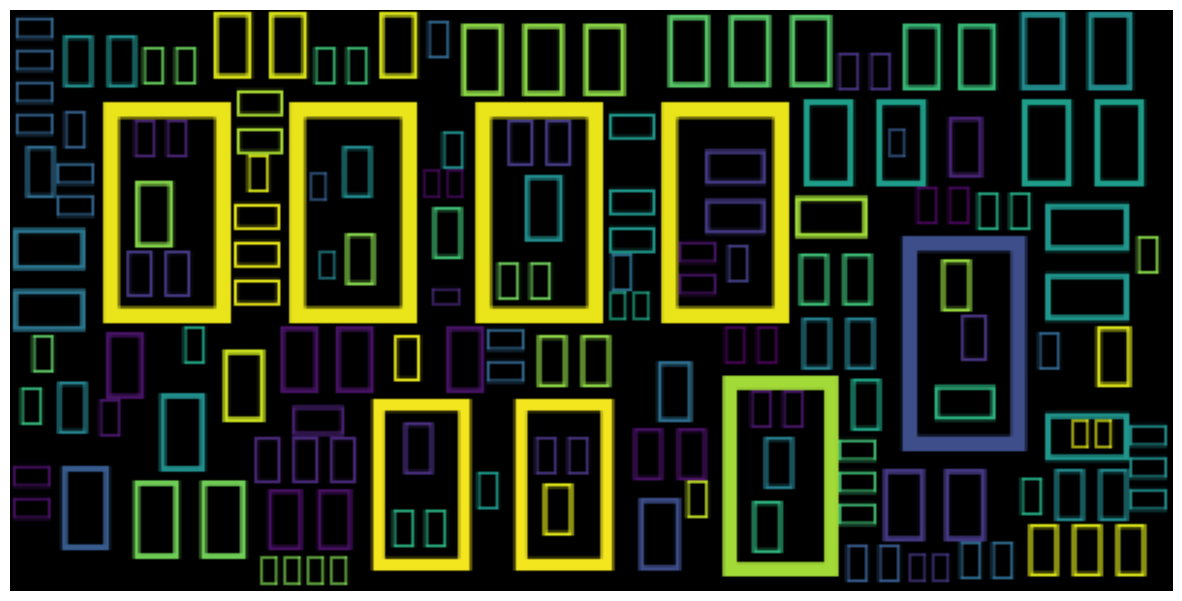

In [74]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_words=100, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()